In [31]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [12]:
a = np.array([2,3])
b = np.array([3,4])

In [13]:
a*b

array([ 6, 12])

In [14]:
a@b

18

In [15]:
a+b

array([5, 7])

In [17]:
np.linalg.norm(b) # 大きさ

5.0

In [22]:
# 1から1000まで計算
a = np.ones(1000)
b = np.arange(1, 1001)
start = time.time()
print(a@b)
end = time.time()
print(end-start) 


start = time.time()
sum=0
for i in range(1000):
    for j in range(1000):
        sum += a[i]*b[j]
print(sum)
end = time.time()
print(end-start)

500500.0
0.0
500500000.0
0.3164515495300293


# 行列

In [24]:
# 単位行列

np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [27]:
# 逆行列

a = np.array([[1,2], [3,4]])
b = np.linalg.inv(a)
print(b)
b@a

[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

指数関数の微分
$$ y = a^x\\ 
    \mathrm{log}y = x\mathrm{log}a\\
    y^{'}/y = \mathrm{log}a\\
    y^{'} = a^x \mathrm{log}a
$$

# ソフトマックス関数

In [28]:
def softmax3(x0, x1, x2):
    u = np.exp(x0) + np.exp(x1) + np.exp(x2)
    y0 = np.exp(x0)/u
    y1 = np.exp(x1)/u
    y2 = np.exp(x2)/u
    return y0, y1, y2

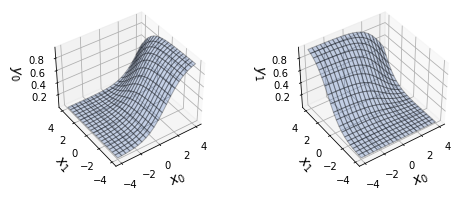

In [37]:
x0n, x1n = 20, 20
x0 = np.linspace(-4, 4, x0n)
x1 = np.linspace(-4, 4, x1n)
xx0, xx1 = np.meshgrid(x0, x1)
y = softmax3(xx0, xx1, 1)

plt.figure(figsize=(8,3))
for i in range(2):
    ax = plt.subplot(1, 2, i+1, projection="3d")
    ax.plot_surface(
        xx0, xx1, y[i],
        rstride=1, cstride=1, alpha=0.3, 
        color="cornflowerblue", edgecolor="black", 
    )
    ax.set_xlabel("$x_0$", fontsize=14)
    ax.set_ylabel("$x_1$", fontsize=14)
    ax.view_init(40, -125)
    ax.set_zlabel(f"$y_{i}$", fontsize=14)
plt.show()

ソフトマックス関数はシグモイド関数の多変数版

# ガウス

In [39]:
def gauss(x0, x1, mu, sigma):
    x = np.array([x0, x1])
    a = 1 / (2*np.pi) /np.linalg.det(sigma)**(1/2)
    inv_sigma = np.linalg.inv(sigma)
    y = a * np.exp(
        (-1/2) * (x-mu).T @ inv_sigma @ (x-mu))
    return y

In [40]:
x0, x1 = 2, 1
mu = np.array([1,2]) # 平均ベクトル
sigma = np.array([[1,0],[0,1]]) #共分散行列
y = gauss(x0, x1, mu, sigma)
y

0.05854983152431917

In [ ]:
mu = np.array([1, 0.5])
sigma_plus = np.array([[0.5,1], [1,1]])
sigma_mins = np.array([[0.5,-1], [-1,1]])
x0_min, x0_max = -3, 3
x1_min, x1_max = -3, 3

x0n, x1n = 40, 40
x0 = np.linspace(x0_min, x0_max, x0n)
x1 = np.linspace(x1_min, x1_max, x0n)

fplus = np.zeros((x1n, x0n))
fmins = np.zeros((x1n, x0n))

for x0i in range(x0n):
    for x1i in range(x1n):
        fplus[x1i, x0i] = gauss(x0[x0i], x1[x1i], mu, sigma_plus)
        fmins[x1i, x0i] = gauss(x0[x0i], x1[x1i], mu, sigma_mins)

# グリッド座標
xx0, xx1 = np.meshgrid(x0, x1)


plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
# 等高線 plus
plt.subplot(2,2,1)
cont = plt.contour(xx0, xx1, fplus, levels=15, colors="black")
plt.xlabel("$x_0$", fontsize=14)
plt.ylabel("$x_1$", fontsize=14)
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.grid()
plt.title("$\sigma_{01}$:plus")

#サーフェス plus
ax = plt.subplot(2,2,2, projection="3d")
ax.plot_surface(
    xx0, xx1, fplus,
    rstride=1, cstride=1, alpha=0.3, color="blue", edgecolor="black",
)
ax.set_zticks([0.05, 0.10])
ax.set_xlabel("$x_0$", fontsize=14)
ax.set_ylabel("$x_1$", fontsize=14)
ax.view_init(40, -100)

# 等高線 mins
plt.subplot(2,2,3)
cont = plt.contour(xx0, xx1, fmins, levels=15, colors="black")
plt.xlabel("$x_0$", fontsize=14)
plt.ylabel("$x_1$", fontsize=14)
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.grid()
plt.title("$\sigma_{01}$:mins")

#サーフェス mins
ax = plt.subplot(2,2,4, projection="3d")
ax.plot_surface(
    xx0, xx1, fmins,
    rstride=1, cstride=1, alpha=0.3, color="blue", edgecolor="black",
)
ax.set_zticks([0.05, 0.10])
ax.set_xlabel("$x_0$", fontsize=14)
ax.set_ylabel("$x_1$", fontsize=14)
ax.view_init(40, -100)
plt.show()